# What is the most optimal skill to learn for Data Analysts?

### Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [19]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [20]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [21]:
df_DA_US_explode = df_DA_US.explode("job_skills")

In [22]:
df_DA_skills = df_DA_US_explode.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

df_DA_skills = df_DA_skills.rename(columns={"count": "skill_count", "median": "median_salary"})

#or could do it this way
# skill_stats = df_DA_US.groupby("job_skills").agg(
#     skill_count=("job_skills", "count"),
#     median_salary=("salary_year_avg", "median")
# )

In [26]:
DA_job_count = len(df_DA_US)

df_DA_skills["skill_percent"] = df_DA_skills["skill_count"] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


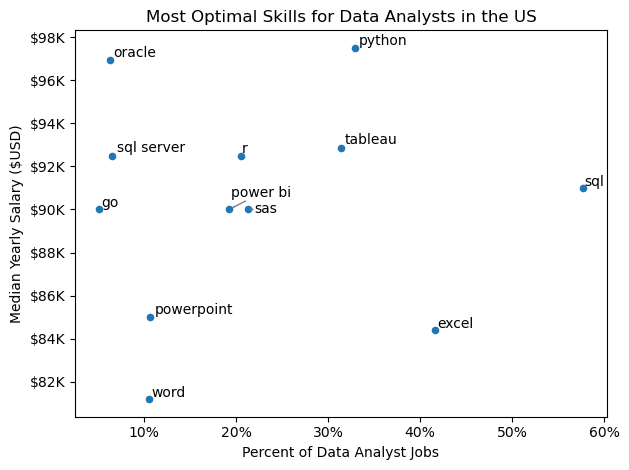

In [29]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind="scatter", x="skill_percent", y="median_salary")
#sns.scatterplot(
    #data=plot_variable
    #x="skill_percent"
    #y="median_salary"
    #hue="technology"
#)

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    #add text to the location of the data points
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Most Optimal Skills for Data Analysts in the US")
plt.tight_layout()
plt.show()